In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lofo import LOFOImportance , Dataset , plot_importance
from sklearn.model_selection import KFold

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\lofo\lofo_importance.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
data = pd.read_csv(r'D:\Work\compi\Kaggl_ Media_campain\train.csv')

In [3]:
data

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


In [4]:
columns = [x for x in data.columns]
columns.remove('id')
columns.remove('cost')

In [5]:
columns

['store_sales(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'gross_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

Plotting

<Figure size 800x1200 with 0 Axes>

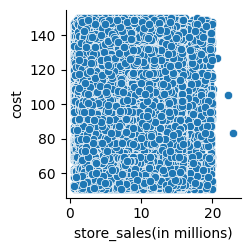

<Figure size 800x1200 with 0 Axes>

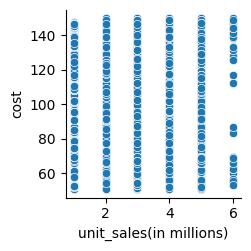

<Figure size 800x1200 with 0 Axes>

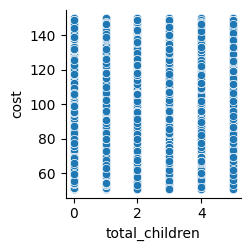

<Figure size 800x1200 with 0 Axes>

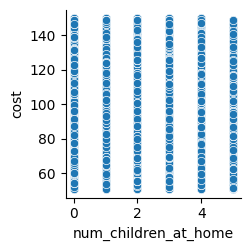

<Figure size 800x1200 with 0 Axes>

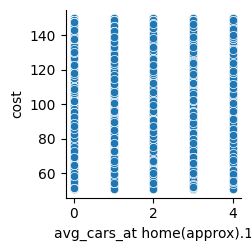

<Figure size 800x1200 with 0 Axes>

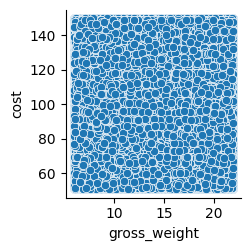

<Figure size 800x1200 with 0 Axes>

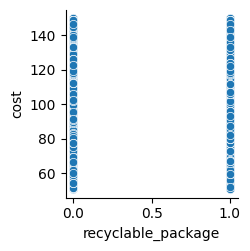

<Figure size 800x1200 with 0 Axes>

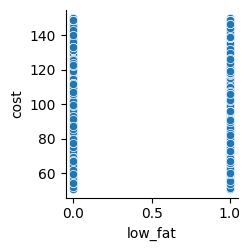

<Figure size 800x1200 with 0 Axes>

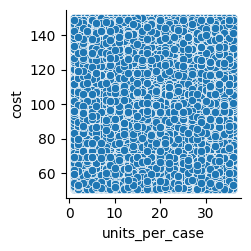

<Figure size 800x1200 with 0 Axes>

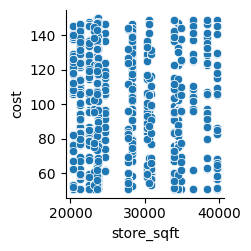

<Figure size 800x1200 with 0 Axes>

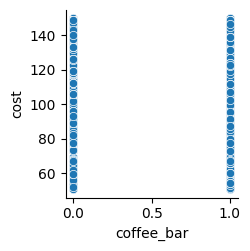

<Figure size 800x1200 with 0 Axes>

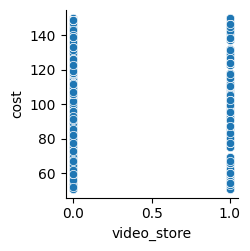

<Figure size 800x1200 with 0 Axes>

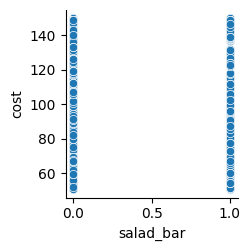

<Figure size 800x1200 with 0 Axes>

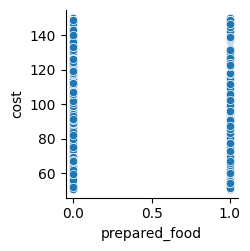

In [6]:
i = 0 
for i in range(14) :
    plt.figure(figsize = (8,12))
    sns.pairplot(data,x_vars = f"{columns[i]}", y_vars = 'cost', kind = 'scatter')
    plt.xlabel(f'{columns[i]}')
    plt.ylabel('cost')
    plt.show()
    i = i+1

Using Lofo to find important features


In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
cv = KFold(n_splits= 4 ,shuffle= False ,random_state= None)

In [9]:
dataset = Dataset(df = data,target='cost',features=columns)
dataset

In [10]:
lofo_imp = LOFOImportance(dataset,cv=cv,scoring='neg_mean_absolute_error',model=RandomForestRegressor())

In [11]:
importance_lofo = lofo_imp.get_importance()

 13%|█▎        | 2/15 [42:06<4:33:43, 1263.38s/it]


KeyboardInterrupt: 

In [ ]:
plot_importance(importance_lofo,kind = 'box')

Training and testing


In [ ]:
columns.remove('gross_weight')
columns.remove('units_per_case')
columns

In [ ]:
from sklearn.model_selection import train_test_split

X = data[columns]
y = data['cost']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error , mean_squared_error


In [ ]:
model = RandomForestRegressor(n_estimators=380,random_state=0,max_features= 'log2',max_depth=18,verbose=2,n_jobs=8,bootstrap=False)
model.fit(X_train,y_train)
pred = model.predict(X_test)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 380building tree 2 of 380
building tree 3 of 380
building tree 4 of 380
building tree 5 of 380
building tree 6 of 380

building tree 7 of 380
building tree 8 of 380
building tree 9 of 380
building tree 10 of 380
building tree 11 of 380
building tree 12 of 380
building tree 13 of 380
building tree 14 of 380
building tree 15 of 380
building tree 16 of 380
building tree 17 of 380
building tree 18 of 380
building tree 19 of 380
building tree 20 of 380
building tree 21 of 380
building tree 22 of 380
building tree 23 of 380
building tree 24 of 380
building tree 25 of 380
building tree 26 of 380
building tree 27 of 380
building tree 28 of 380
building tree 29 of 380
building tree 30 of 380
building tree 31 of 380
building tree 32 of 380
building tree 33 of 380
building tree 34 of 380
building tree 35 of 380
building tree 36 of 380
building tree 37 of 380
building tree 38 of 380
building tree 39 of 380
building tree 40 of 380


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.7s


building tree 41 of 380
building tree 42 of 380
building tree 43 of 380
building tree 44 of 380
building tree 45 of 380
building tree 46 of 380
building tree 47 of 380
building tree 48 of 380
building tree 49 of 380
building tree 50 of 380
building tree 51 of 380
building tree 52 of 380
building tree 53 of 380
building tree 54 of 380
building tree 55 of 380
building tree 56 of 380
building tree 57 of 380
building tree 58 of 380
building tree 59 of 380
building tree 60 of 380
building tree 61 of 380
building tree 62 of 380
building tree 63 of 380
building tree 64 of 380
building tree 65 of 380
building tree 66 of 380
building tree 67 of 380
building tree 68 of 380
building tree 69 of 380
building tree 70 of 380
building tree 71 of 380
building tree 72 of 380
building tree 73 of 380
building tree 74 of 380
building tree 75 of 380
building tree 76 of 380
building tree 77 of 380
building tree 78 of 380
building tree 79 of 380
building tree 80 of 380
building tree 81 of 380
building tree 82

[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.6s


building tree 157 of 380
building tree 158 of 380
building tree 159 of 380
building tree 160 of 380
building tree 161 of 380
building tree 162 of 380
building tree 163 of 380
building tree 164 of 380
building tree 165 of 380
building tree 166 of 380
building tree 167 of 380
building tree 168 of 380
building tree 169 of 380
building tree 170 of 380
building tree 171 of 380
building tree 172 of 380
building tree 173 of 380
building tree 174 of 380
building tree 175 of 380
building tree 176 of 380
building tree 177 of 380
building tree 178 of 380
building tree 179 of 380
building tree 180 of 380
building tree 181 of 380
building tree 182 of 380
building tree 183 of 380
building tree 184 of 380
building tree 185 of 380
building tree 186 of 380
building tree 187 of 380
building tree 188 of 380
building tree 189 of 380
building tree 190 of 380
building tree 191 of 380
building tree 192 of 380
building tree 193 of 380
building tree 194 of 380
building tree 195 of 380
building tree 196 of 380


[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   20.7s


building tree 360 of 380
building tree 361 of 380
building tree 362 of 380
building tree 363 of 380
building tree 364 of 380
building tree 365 of 380
building tree 366 of 380
building tree 367 of 380
building tree 368 of 380
building tree 369 of 380
building tree 370 of 380
building tree 371 of 380
building tree 372 of 380
building tree 373 of 380
building tree 374 of 380
building tree 375 of 380
building tree 376 of 380
building tree 377 of 380
building tree 378 of 380
building tree 379 of 380
building tree 380 of 380


[Parallel(n_jobs=8)]: Done 380 out of 380 | elapsed:   22.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 380 out of 380 | elapsed:    0.9s finished


In [ ]:
mape = mean_absolute_percentage_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)

In [ ]:
print(f'Mean Squared error = {mse}')
print(f'Mean Absolute error = {mae}')
print(f'Mean Absolute Percentage error = {mape * 100}')

Mean Squared error = 797.7946502413657
Mean Absolute error = 24.121727097653828
Mean Absolute Percentage error = 27.90235091829657


In [ ]:
cross_pred = model.predict(X_train)
print('Mean absolute percentange error on train set :',mean_absolute_percentage_error(y_train,cross_pred))
print('Mean absolute error on train set :',mean_absolute_error(y_train,cross_pred))
print('Mean Squared error on train set : ',mean_squared_error(y_train,cross_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    3.3s


Mean absolute percentange error on train set : 0.22864214867813148
Mean absolute error on train set : 19.809979579542016
Mean Squared error on train set :  555.2364273848751


[Parallel(n_jobs=8)]: Done 380 out of 380 | elapsed:    3.6s finished


Submission

In [ ]:
#sub_file = pd.read_csv(r'D:\Work\compi\Kaggl_ Media_campain\test.csv')
#columns_tst = [x for x in sub_file.columns]
#columns_tst.remove('id')
#columns_tst

In [ ]:
#sub_pred = model.predict(sub_file[columns_tst])
#sub_file_fin = pd.DataFrame()

In [ ]:
#sub_file_fin['id'] = sub_file['id']
#sub_file_fin['cost'] = sub_pred
#sub_file_fin

In [ ]:
#sub_file_fin.to_csv("sub8.csv",index= False)